
# 📈 Mini Project 3: Black-Scholes Option Pricing Analysis

**Course:** 2025 Introduction to Quantitative Methods in Finance  
**Institution:** The Erdös Institute  

This notebook explores how the prices of European call and put options, modeled using the Black-Scholes formula, vary with two key parameters: time to expiration and the spot price of the underlying asset.  
The project includes:
- Pricing call and put options across a range of times and spot prices
- Analyzing the sensitivity of options via numerical Theta and Delta
- Drawing visual interpretations of these sensitivities


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')


In [2]:

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Computes the Black-Scholes value of a European call option.

    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate

    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Computes the Black-Scholes value of a European put option.

    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate

    Returns:
        Put option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)



## A) Call Option: Time to Expiration Analysis

We compute the Black-Scholes prices of a European call option across a range of expiration times (1 month to 5 years). Then, we visualize how these prices evolve over time.


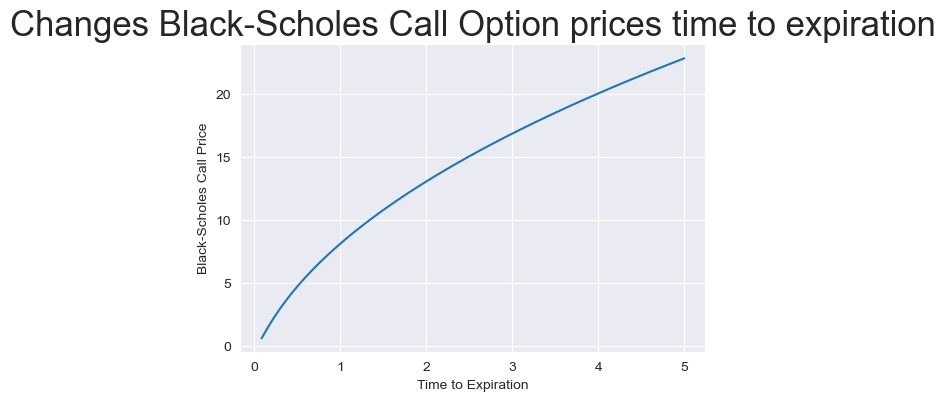

In [3]:

S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (6,4))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()



We observe that the value of the call option increases with expiration time. More time gives the underlying asset a better chance to rise above the strike price.


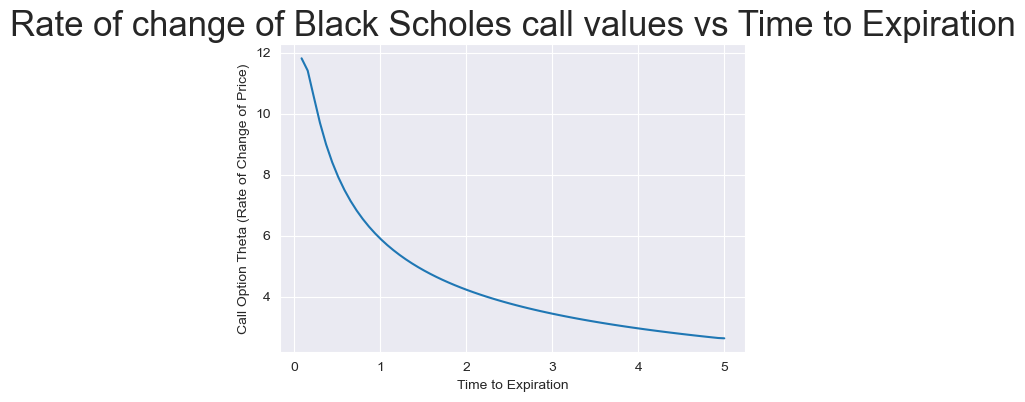

In [4]:

call_theta_numerical = np.gradient(call_prices, times)  # Theta via finite differences
plt.figure(figsize=(6, 4))
plt.title('Rate of change of Black Scholes call values vs Time to Expiration', size=25)
plt.plot(times, call_theta_numerical)
plt.xlabel('Time to Expiration')
plt.ylabel('Call Option Theta (Rate of Change of Price)')
plt.show()



## B) Call Option: Spot Price Sensitivity

Next, we analyze how the call option value responds to changes in the initial stock price $S_0$.


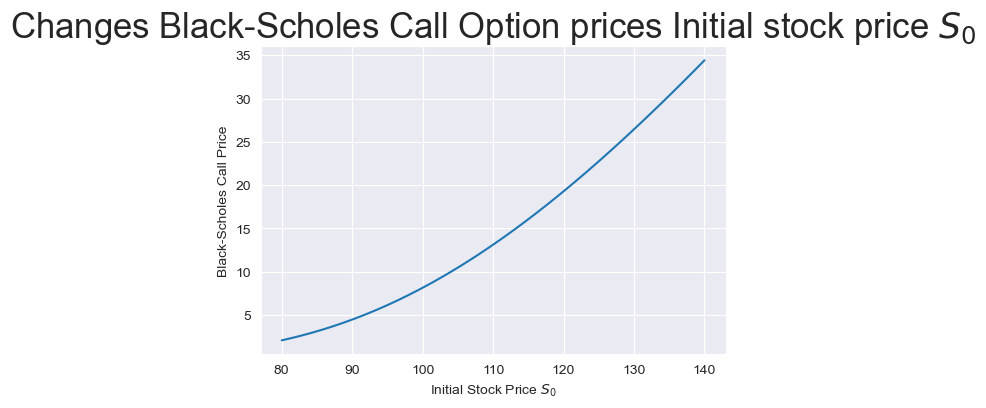

In [5]:

K = 110
sigma = .3
time=1
s0 = np.linspace(80, 140, 100)

call_prices2= [bs_call(s0[i],K,sigma, t = time) for i in range(len(s0))] 

plt.figure(figsize = (6,4))
plt.title('Changes Black-Scholes Call Option prices Initial stock price $S_0$', size = 25)
plt.plot(s0, call_prices2)
plt.xlabel('Initial Stock Price $S_0$')
plt.ylabel('Black-Scholes Call Price')
plt.show()



Call prices increase with higher $S_0$ — as expected, since the call option becomes more valuable when the asset is likely to exceed the strike price.


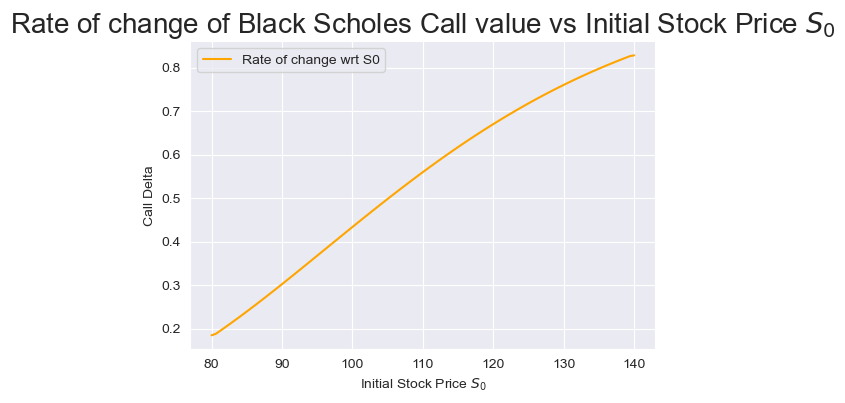

In [6]:

call_delta = np.gradient(call_prices2, s0)
plt.figure(figsize=(6, 4))
plt.title('Rate of change of Black Scholes Call value vs Initial Stock Price $S_0$', size=20)
plt.plot(s0, call_delta, label='Rate of change wrt S0', color='orange')
plt.xlabel('Initial Stock Price $S_0$')
plt.ylabel('Call Delta')
plt.legend()
plt.show()



## C) Put Option: Time to Expiration Analysis

We now repeat the time analysis for the put option.


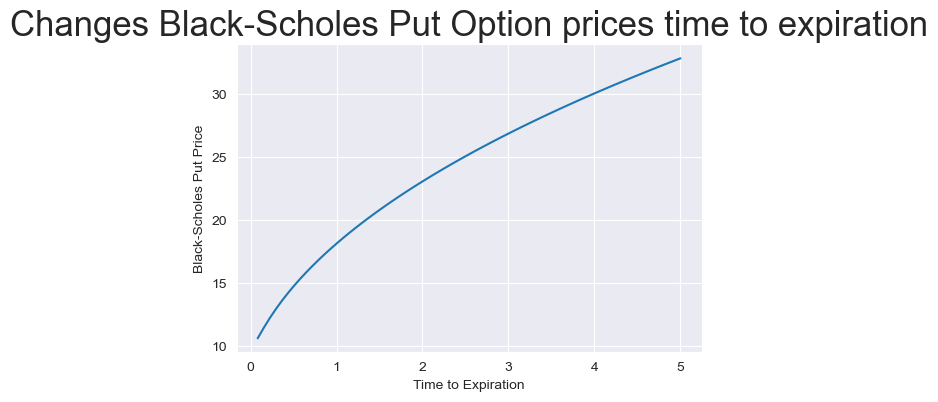

In [7]:

put_prices=[bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (6,4))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()


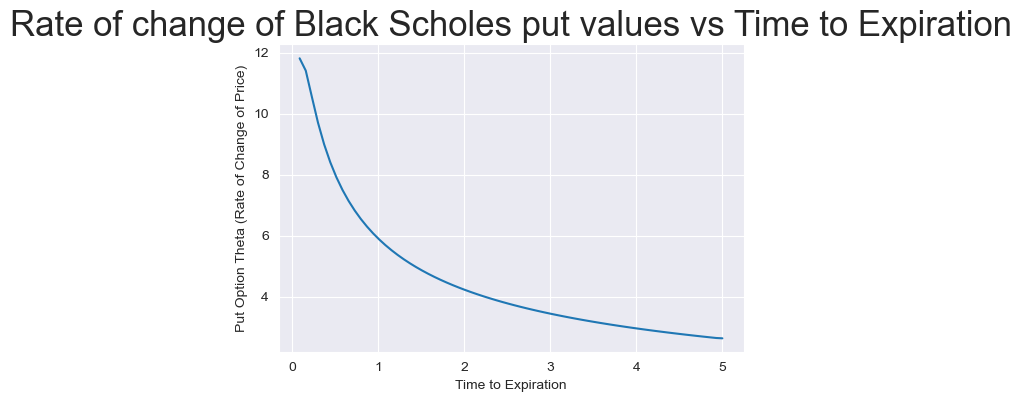

In [8]:

put_theta_numerical = np.gradient(put_prices, times)
plt.figure(figsize=(6, 4))
plt.title('Rate of change of Black Scholes put values vs Time to Expiration', size=25)
plt.plot(times, put_theta_numerical)
plt.xlabel('Time to Expiration')
plt.ylabel('Put Option Theta (Rate of Change of Price)')
plt.show()



## D) Put Option: Spot Price Sensitivity

Finally, we evaluate how put prices change with varying initial stock prices.


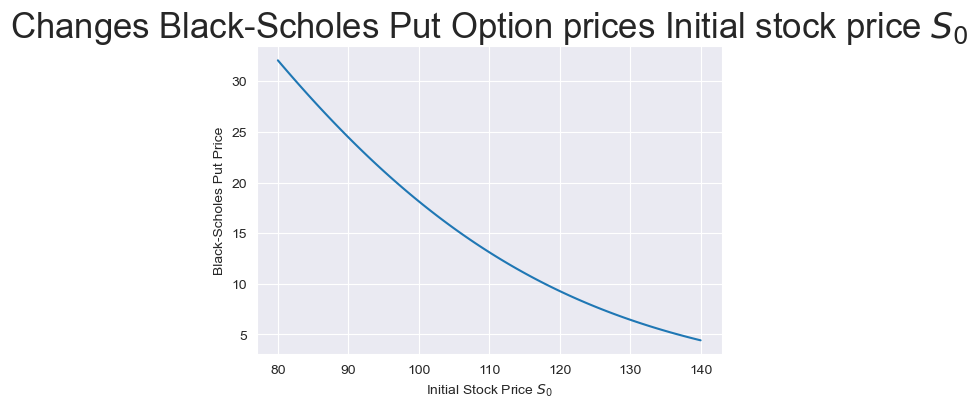

In [9]:

put_prices2= [bs_put(s0[i],K,sigma, t = time) for i in range(len(s0))] 

plt.figure(figsize = (6,4))
plt.title('Changes Black-Scholes Put Option prices Initial stock price $S_0$', size = 25)
plt.plot(s0, put_prices2)
plt.xlabel('Initial Stock Price $S_0$')
plt.ylabel('Black-Scholes Put Price')
plt.show()


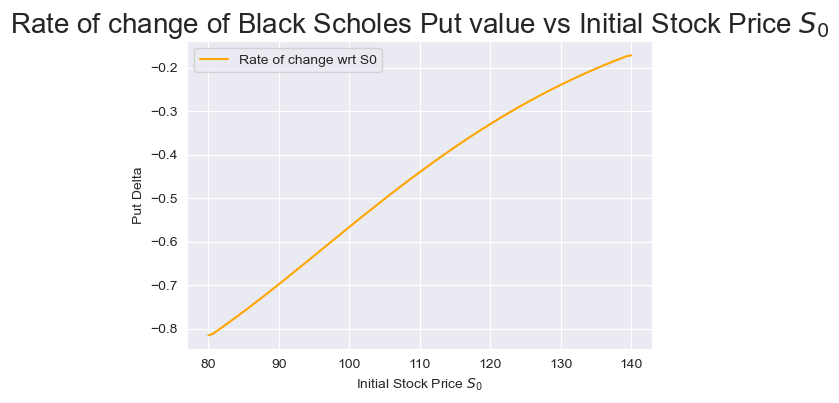

In [10]:

put_delta = np.gradient(put_prices2, s0)
plt.figure(figsize=(6, 4))
plt.title('Rate of change of Black Scholes Put value vs Initial Stock Price $S_0$', size=20)
plt.plot(s0, put_delta, label='Rate of change wrt S0', color='orange')
plt.xlabel('Initial Stock Price $S_0$')
plt.ylabel('Put Delta')
plt.legend()
plt.show()



## 📊 Observations & Interpretations

### 🔹 Call Option – Time Sensitivity
- Longer time to expiration leads to higher call option prices.
- The rate of price change (Theta) becomes more negative as expiration nears, indicating accelerating time decay.

### 🔹 Call Option – Spot Price Sensitivity
- Call prices increase as $S_0$ increases.
- Delta approaches 1 for deep in-the-money options, reflecting higher sensitivity to price.

### 🔹 Put Option – Time Sensitivity
- Longer time to expiration also increases put option prices.
- Theta is negative, but less severe than for calls.

### 🔹 Put Option – Spot Price Sensitivity
- Put option values decrease as $S_0$ increases.
- Delta is negative and trends toward -1 for in-the-money options.



## ✅ Conclusion

This project successfully demonstrates how option prices under the Black-Scholes model respond to key inputs.  
Visualizing these sensitivities helps build intuition around risk management and option strategy design.  
Numerical derivatives (Theta and Delta) provide valuable tools for assessing option behavior under changing market conditions.
